In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

#sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
import loompy as lp
import pandas as pd

In [3]:
lf = lp.connect("placodes_pyscenic_output.loom",  validate=False , mode='r+')

In [4]:
lf

In [5]:
lf.ca.CellID

array(['AAACGAAGTTGAGAGC-1', 'AAACGCTGTCCGACGT-1', 'AAAGGATTCAAGTTGC-1',
       ..., 'TTTGTTGAGGCAGCTA-1-3', 'TTTGTTGCATTCTTCA-1-3',
       'TTTGTTGTCCTAAACG-1-3'], dtype=object)

In [6]:
lf.ca.RegulonsAUC

array([(0.03390049, 0.03803379, 0., 0.       , 0.00933488, 0., 0.05229927, 0.06122682, 0., 0.04919574, 0.04470686, 0.01202505, 0.02483271, 0.03163555, 0.        , 0.03257467, 0.05726254, 0.04457569, 0., 0.0344329 , 0., 0.01553821, 0.06361525, 0.03736094, 0.12129415, 0.01717503, 0., 0.07057751, 0.08230214, 0.04205891, 0.        , 0.01127718, 0.06041619, 0.0167894 , 0.        , 0.01078886, 0.01057965, 0.00570505, 0.00667645, 0.        , 0.19799731, 0.08784834, 0.00518175, 0., 0.        , 0.03996906, 0.03490978, 0., 0.02500971, 0.03648343, 0.06921917, 0.01575347, 0.00424376, 0.07429001, 0.02175486, 0.03962956, 0.0147421 , 0.08993039, 0.03941611, 0.05004881, 0.04917049, 0.04456077, 0.06590988, 0., 0.03855375, 0.04300003, 0.04148492, 0.05102595, 0.00367363, 0.00798576, 0.03959406, 0., 0.00556172, 0.04792707, 0.03392763, 0.02550563, 0.01033537, 0.        , 0.03050614, 0.02488354, 0.        , 0.        , 0.        , 0.01909558, 0.        , 0.00802398, 0.04238397, 0.01970899, 0., 0.02112019, 0

In [7]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [8]:
auc_mtx

,2610021A01Rik(+),Ahdc1(+),Alx1(+),Alx3(+),Alx4(+),Ar(+),Arid3a(+),Arid3b(+),Arid5a(+),Arid5b(+),...,Zfp955b(+),Zfp992(+),Zfp995(+),Zfx(+),Zic1(+),Zic4(+),Zkscan16(+),Zkscan17(+),Zkscan4(+),Zkscan7(+)
AAACGAAGTTGAGAGC-1,0.033900,0.038034,0.0,0.000000,0.009335,0.0,0.052299,0.061227,0.000000,0.049196,...,0.000000,0.101229,0.000000,0.065180,0.000000,0.0,0.000000,0.035915,0.0,0.0
AAACGCTGTCCGACGT-1,0.000000,0.031517,0.0,0.000000,0.016759,0.0,0.041015,0.065806,0.000000,0.062248,...,0.020719,0.102260,0.000000,0.050276,0.026623,0.0,0.000000,0.016628,0.0,0.0
AAAGGATTCAAGTTGC-1,0.000000,0.029610,0.0,0.000000,0.011632,0.0,0.028510,0.041438,0.000000,0.032933,...,0.000000,0.079316,0.000000,0.023682,0.044797,0.0,0.000000,0.016519,0.0,0.0
AAAGGTAAGGGTACGT-1,0.000000,0.019667,0.0,0.000000,0.010750,0.0,0.022993,0.049231,0.000000,0.043090,...,0.032157,0.000000,0.000000,0.048106,0.000089,0.0,0.000000,0.011806,0.0,0.0
AAAGGTACAGTCAGTT-1,0.018304,0.036423,0.0,0.000000,0.002398,0.0,0.033987,0.047441,0.000000,0.047567,...,0.000000,0.019507,0.000000,0.027675,0.000000,0.0,0.000000,0.019129,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTTACCG-1-3,0.024813,0.037081,0.0,0.000000,0.004184,0.0,0.038006,0.036158,0.050425,0.031124,...,0.000000,0.088940,0.000000,0.070678,0.004402,0.0,0.000000,0.031987,0.0,0.0
TTTGTTGAGCAAGCCA-1-3,0.058198,0.028325,0.0,0.000000,0.000750,0.0,0.044791,0.032604,0.000000,0.036406,...,0.000000,0.000000,0.000000,0.037470,0.000000,0.0,0.006776,0.014767,0.0,0.0
TTTGTTGAGGCAGCTA-1-3,0.000000,0.019773,0.0,0.000000,0.013991,0.0,0.032700,0.031682,0.000000,0.036704,...,0.000000,0.000000,0.000000,0.042582,0.025314,0.0,0.072073,0.002912,0.0,0.0
TTTGTTGCATTCTTCA-1-3,0.000000,0.035678,0.0,0.000000,0.014896,0.0,0.049656,0.057088,0.000000,0.055876,...,0.000000,0.044169,0.029234,0.046217,0.016717,0.0,0.019482,0.038791,0.0,0.0


In [9]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons

In [10]:
auc_mtx

,2610021A01Rik(+),Ahdc1(+),Alx1(+),Alx3(+),Alx4(+),Ar(+),Arid3a(+),Arid3b(+),Arid5a(+),Arid5b(+),...,Zfp955b(+),Zfp992(+),Zfp995(+),Zfx(+),Zic1(+),Zic4(+),Zkscan16(+),Zkscan17(+),Zkscan4(+),Zkscan7(+)
AAACGAAGTTGAGAGC-1,0.033900,0.038034,0.0,0.000000,0.009335,0.0,0.052299,0.061227,0.000000,0.049196,...,0.000000,0.101229,0.000000,0.065180,0.000000,0.0,0.000000,0.035915,0.0,0.0
AAACGCTGTCCGACGT-1,0.000000,0.031517,0.0,0.000000,0.016759,0.0,0.041015,0.065806,0.000000,0.062248,...,0.020719,0.102260,0.000000,0.050276,0.026623,0.0,0.000000,0.016628,0.0,0.0
AAAGGATTCAAGTTGC-1,0.000000,0.029610,0.0,0.000000,0.011632,0.0,0.028510,0.041438,0.000000,0.032933,...,0.000000,0.079316,0.000000,0.023682,0.044797,0.0,0.000000,0.016519,0.0,0.0
AAAGGTAAGGGTACGT-1,0.000000,0.019667,0.0,0.000000,0.010750,0.0,0.022993,0.049231,0.000000,0.043090,...,0.032157,0.000000,0.000000,0.048106,0.000089,0.0,0.000000,0.011806,0.0,0.0
AAAGGTACAGTCAGTT-1,0.018304,0.036423,0.0,0.000000,0.002398,0.0,0.033987,0.047441,0.000000,0.047567,...,0.000000,0.019507,0.000000,0.027675,0.000000,0.0,0.000000,0.019129,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTTACCG-1-3,0.024813,0.037081,0.0,0.000000,0.004184,0.0,0.038006,0.036158,0.050425,0.031124,...,0.000000,0.088940,0.000000,0.070678,0.004402,0.0,0.000000,0.031987,0.0,0.0
TTTGTTGAGCAAGCCA-1-3,0.058198,0.028325,0.0,0.000000,0.000750,0.0,0.044791,0.032604,0.000000,0.036406,...,0.000000,0.000000,0.000000,0.037470,0.000000,0.0,0.006776,0.014767,0.0,0.0
TTTGTTGAGGCAGCTA-1-3,0.000000,0.019773,0.0,0.000000,0.013991,0.0,0.032700,0.031682,0.000000,0.036704,...,0.000000,0.000000,0.000000,0.042582,0.025314,0.0,0.072073,0.002912,0.0,0.0
TTTGTTGCATTCTTCA-1-3,0.000000,0.035678,0.0,0.000000,0.014896,0.0,0.049656,0.057088,0.000000,0.055876,...,0.000000,0.044169,0.029234,0.046217,0.016717,0.0,0.019482,0.038791,0.0,0.0


In [11]:
res=pd.concat([pd.Series(r.tolist(),index=regulons.dtype.names) for r in regulons],axis=1)

In [12]:
res.to_csv("epcam_placods_7_16_06.csv")


In [13]:
res

,0,1,2,3,4,5,6,7,8,9,...,25855,25856,25857,25858,25859,25860,25861,25862,25863,25864
2610021A01Rik(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahdc1(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx1(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx3(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx4(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zic4(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zkscan16(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zkscan17(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zkscan4(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
adata_genes=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/h5ad/14_06_all_placods_epcam_umap_last.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


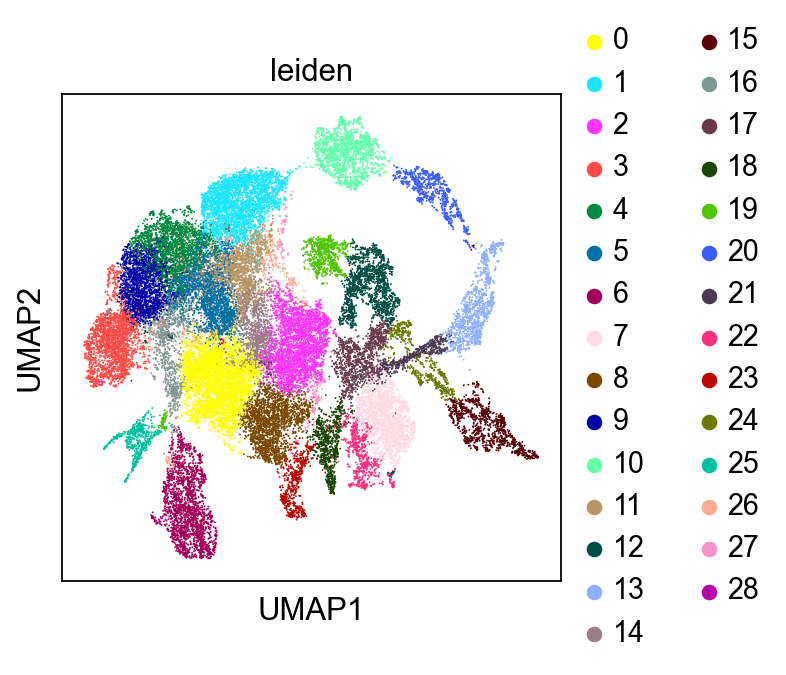

In [15]:
sc.pl.umap(adata_genes,color="leiden")

running Leiden clustering
    finished: found 50 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


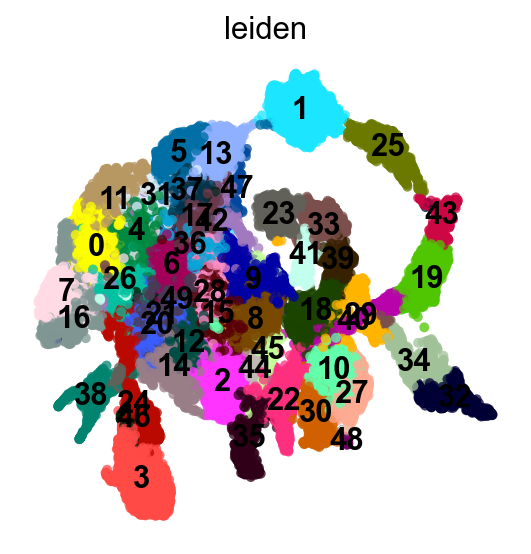

In [16]:
sc.tl.leiden(adata_genes, resolution=2.2)
sc.pl.umap(adata_genes, color = ["leiden"],  frameon = False, size = 80, alpha = .75, legend_loc='on data')

In [17]:
adata_genes1=adata_genes.copy()

In [18]:
cluster_annotations = {
'0': 'rest','1': 'Otic vesicle','2': 'Adenohypophyseal', '3': 'rest',
'4': 'rest','5': 'Otic','6': 'Epibranchial','7': 'rest','8': 'Trigeminal',
'9': 'Epibranchial', '10': 'rest','11': 'rest','12': 'rest','13': 'Otic',
'14': 'Adenohypophyseal','15': 'Trigeminal','16': 'rest','17': 'Epibranchial',
'18': 'Epibranchial neurulation','19': 'Trigeminal  neurulation',
'20': 'rest', '21': 'rest','22': 'Lens', '23': 'rest','24': 'rest',
'25': 'Otic neurulation', '26': 'rest','27': 'rest','28': 'Epibranchial',
'29': 'Trigeminal  neurulation', '30': 'rest','31': 'rest', '32': 'Epibranchial neurulation',
'33': 'rest','34': 'Epibranchial neurulation',  '35': 'Olfactory', '36': 'Epibranchial',
'37': 'Otic','38': 'rest', '39': 'rest','40': 'Epibranchial neurulation','41': 'rest',
'42': 'Otic','43': 'Trigeminal  neurulation','44': 'rest','45': 'rest','46': 'rest',
'47': 'Otic','48': 'rest','49': 'rest'   }

adata_genes.obs['cluster_annotations'] = adata_genes.obs['leiden'].map(cluster_annotations)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


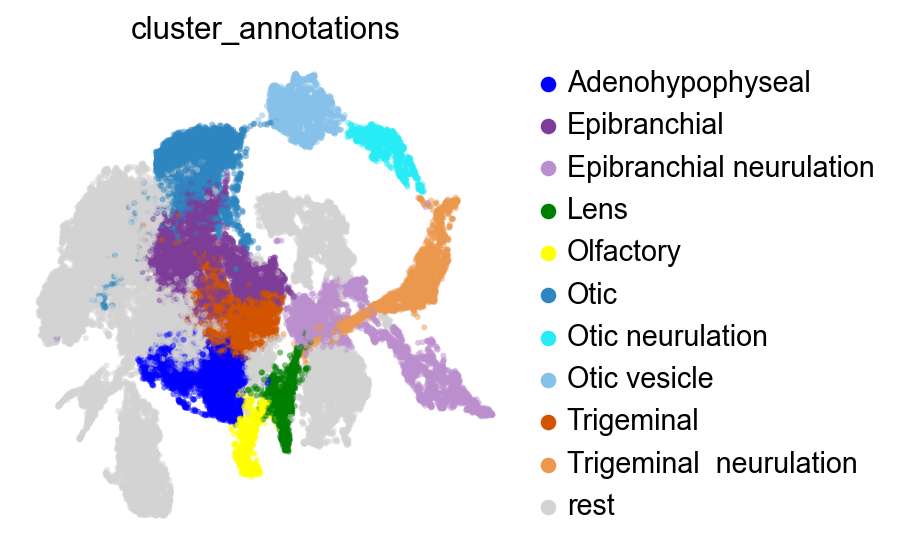

In [19]:
adata_genes.obs['cluster_annotations'] = adata_genes.obs['cluster_annotations'].astype('category')

highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Epibranchial neurulation': '#bb8fce',
    'Lens': 'green',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Otic vesicle': '#85c1e9',
    'Trigeminal': '#d35400',
    'Trigeminal  neurulation': '#eb984e',
    'Otic neurulation': '#27EBF5',
    'rest': 'lightgray'  # Gray for "rest"
}

# Apply these colors to the clusters
adata_genes.uns['cluster_annotations_colors'] = [
    highlight_colors[cat] if cat in highlight_colors else 'lightgray'
    for cat in adata_genes.obs['cluster_annotations'].cat.categories
]

# Plot the UMAP with custom colors
sc.pl.umap( adata_genes, color='cluster_annotations', frameon=False, size=30,
    alpha=0.5,
 save='epcam_all.pdf'
)


In [21]:
adata_genes.uns['log1p']["base"] = None 
#adata.uns['log1p']["base"] = None 

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:17)


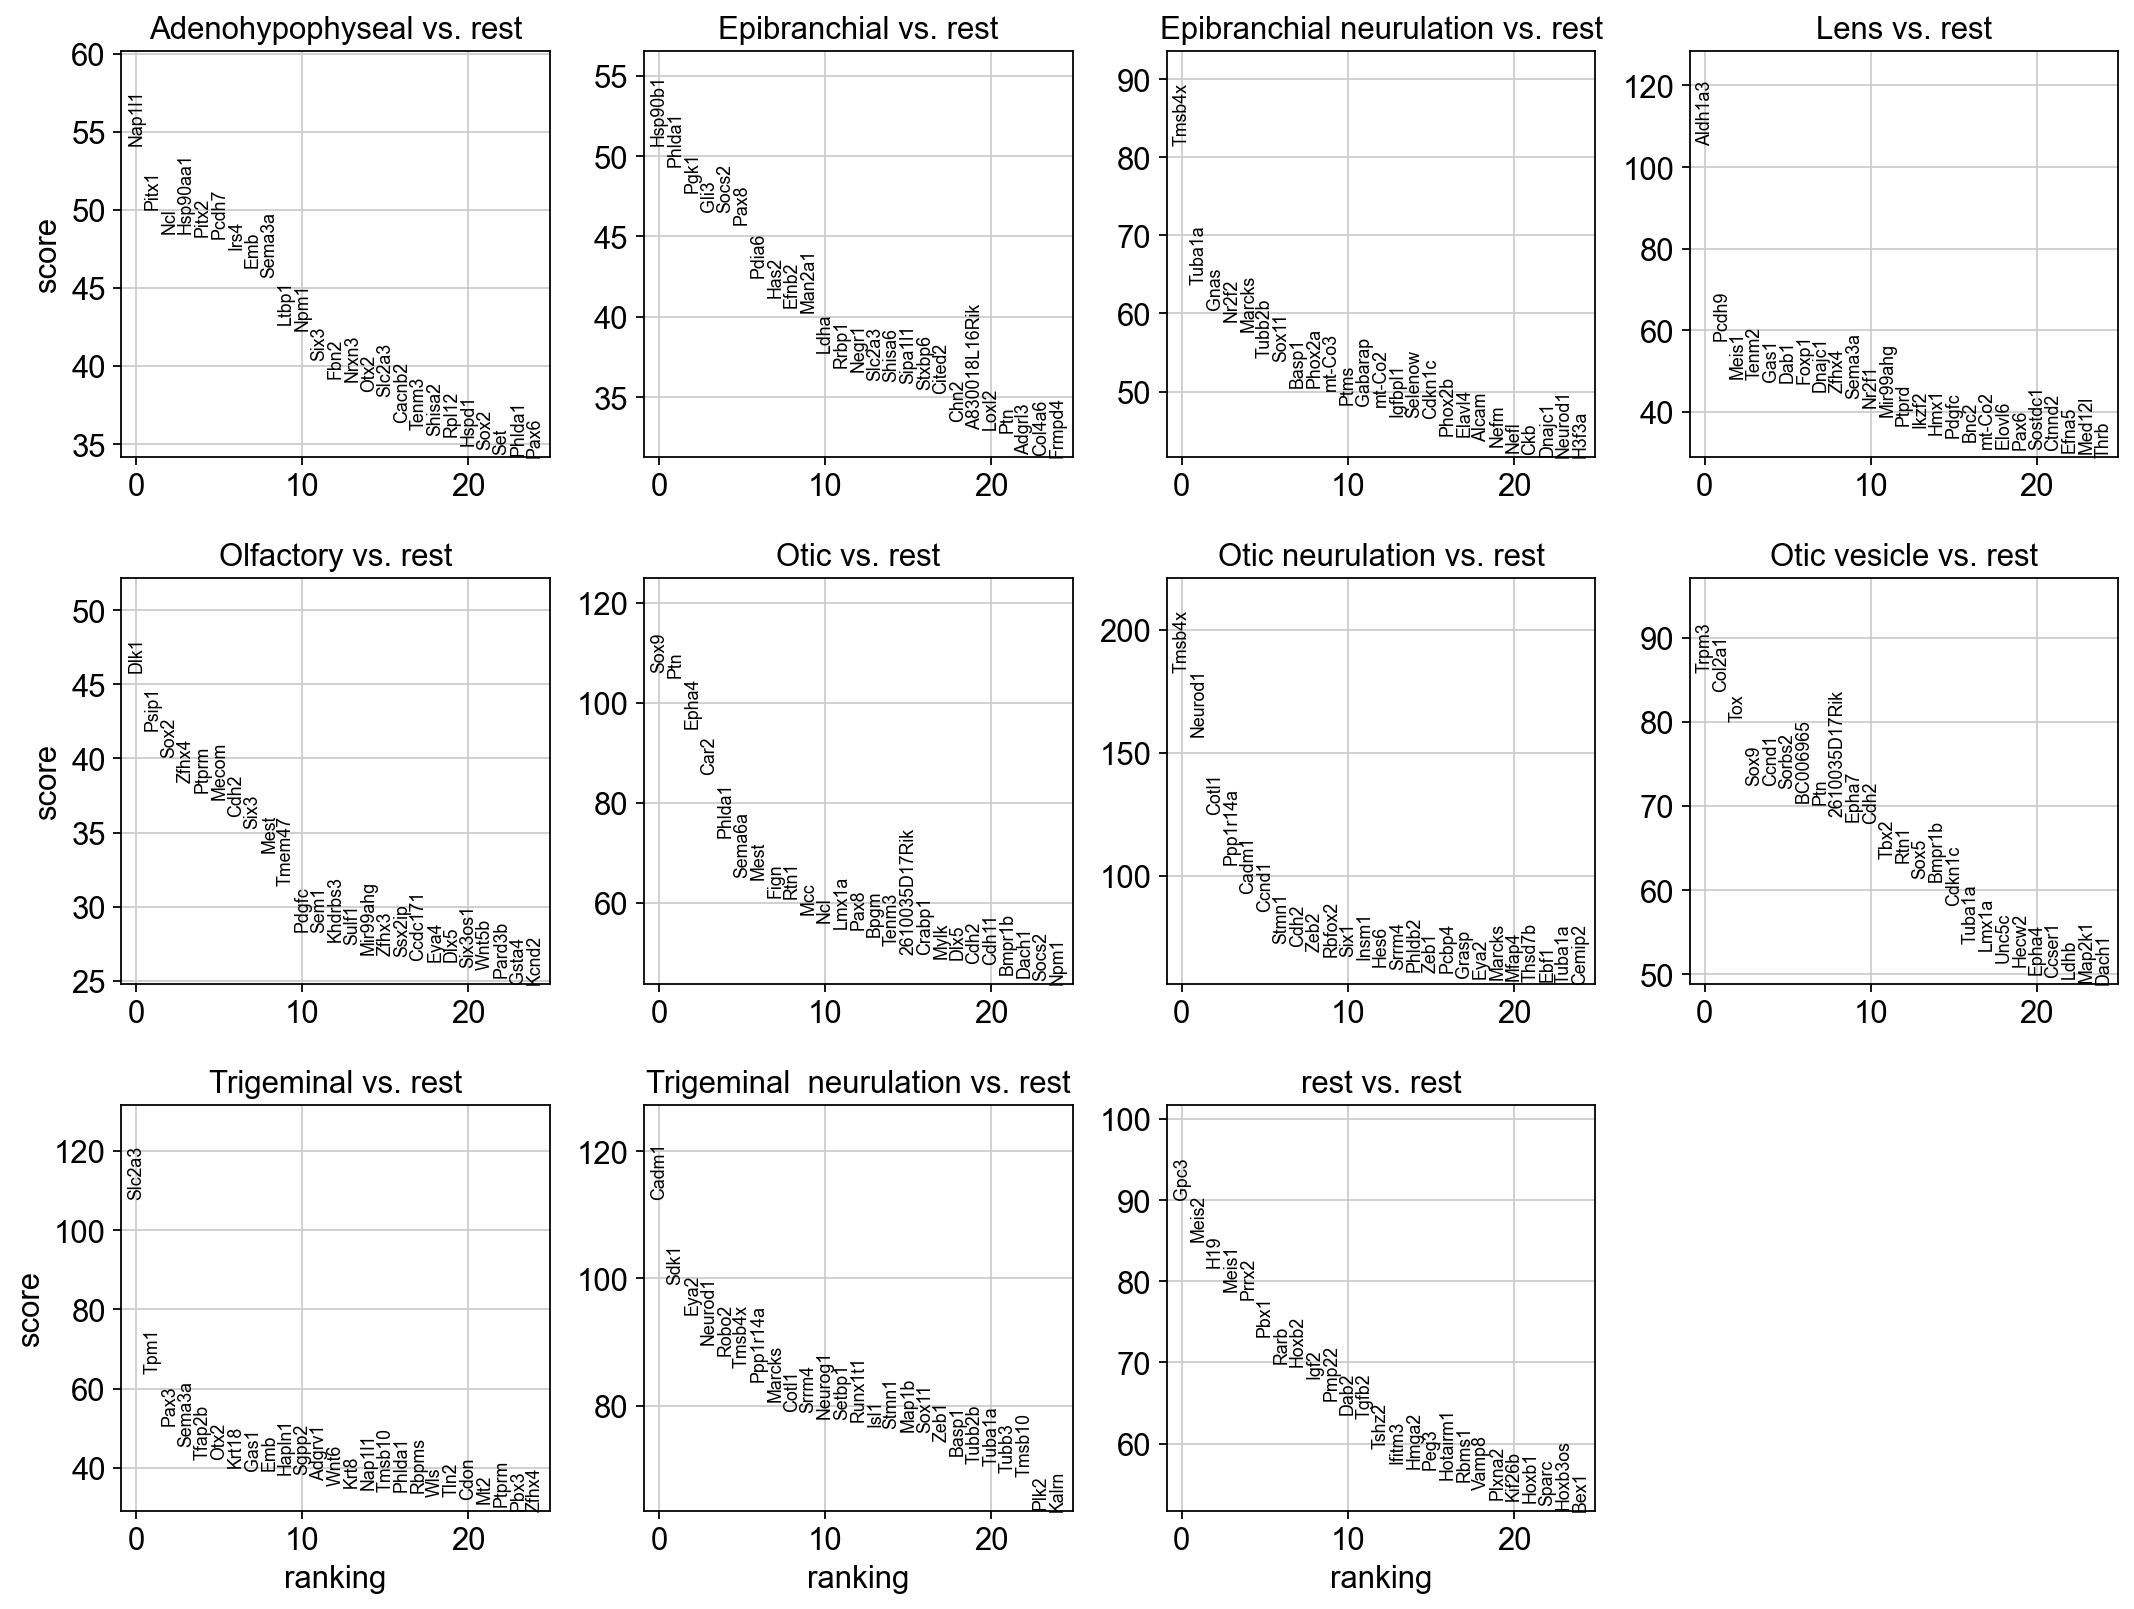

In [22]:
sc.tl.rank_genes_groups(adata_genes, "cluster_annotations", mask_var="highly_variable", method="t-test")
sc.pl.rank_genes_groups(adata_genes, n_genes=25, sharey=False)

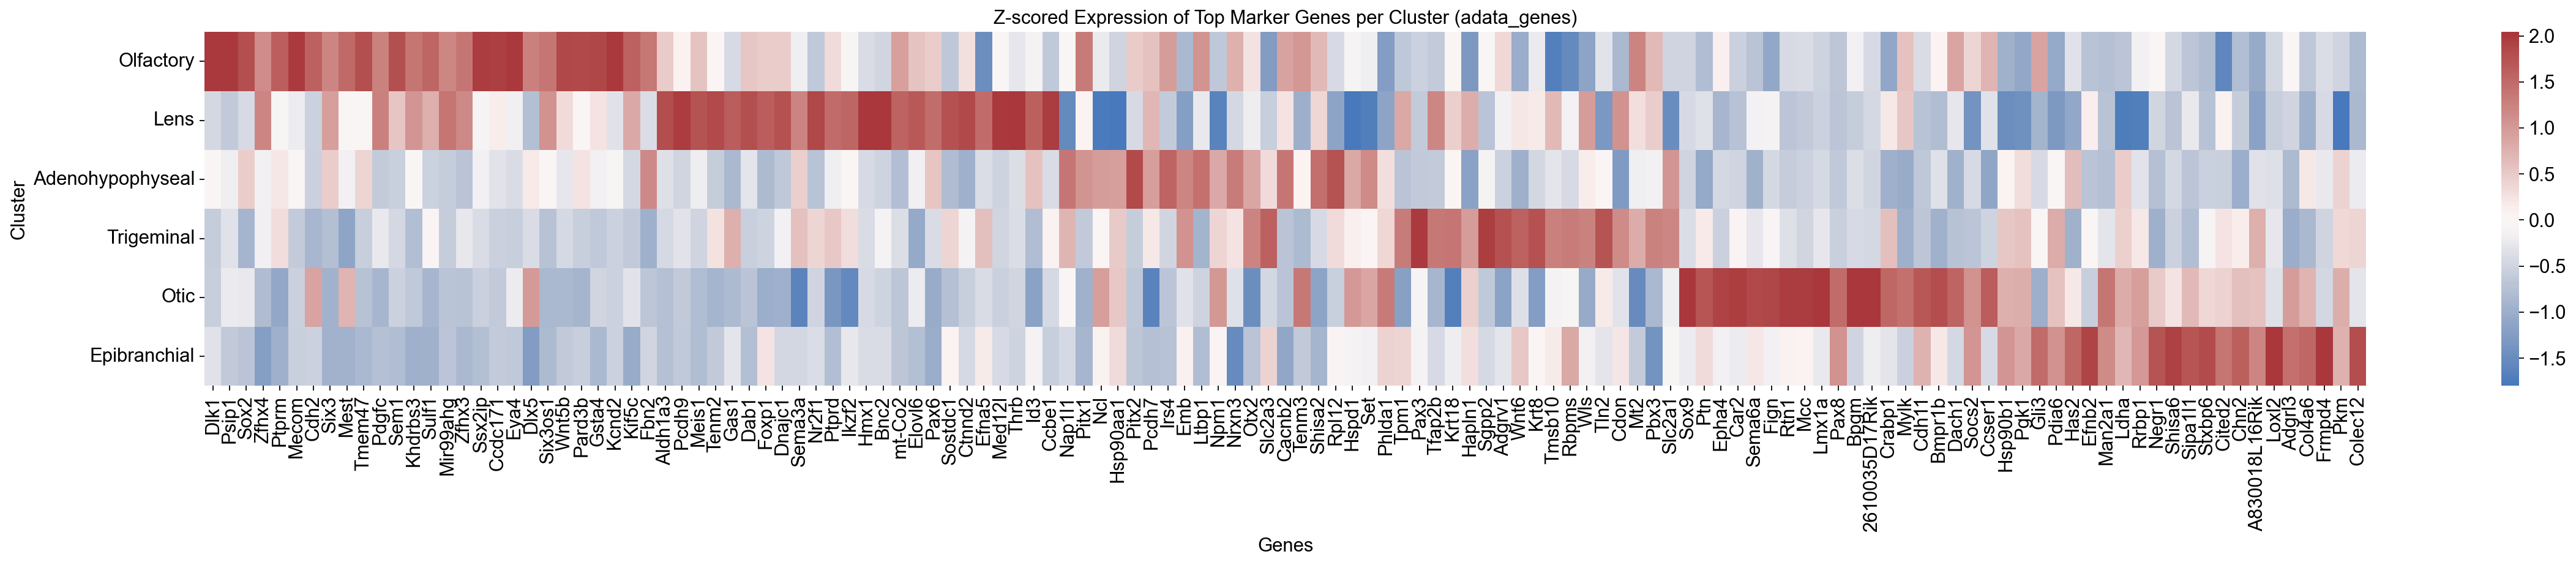

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

# ----------------------------------------
# Step 1: Define clusters of interest
# ----------------------------------------
focus_clusters = [
    "Olfactory", "Lens", "Adenohypophyseal",
    "Trigeminal", "Otic", "Epibranchial"
]

# ----------------------------------------
# Step 2: Extract top N genes per cluster
# ----------------------------------------
top_n = 27
ranked = adata_genes.uns['rank_genes_groups']
grouped_genes = []

for cluster in focus_clusters:
    if cluster in ranked['names'].dtype.names:
        top_genes = ranked['names'][cluster][:top_n].tolist()
        grouped_genes.extend(top_genes)

# ----------------------------------------
# Step 3: Remove duplicates and filter valid genes
# ----------------------------------------
genes_unique = list(OrderedDict.fromkeys(grouped_genes))
valid_genes = [g for g in genes_unique if g in adata_genes.var_names]
gene_indices = adata_genes.var_names.get_indexer(valid_genes)

# ----------------------------------------
# Step 4: Extract expression matrix (cells x genes)
# ----------------------------------------
X_subset = adata_genes.X[:, gene_indices]
if not isinstance(X_subset, np.ndarray):
    X_subset = X_subset.toarray()

expr_df = pd.DataFrame(
    X_subset,
    index=adata_genes.obs['cluster_annotations'],
    columns=valid_genes
)

# ----------------------------------------
# Step 5: Compute mean expression per cluster
# ----------------------------------------
expr_cluster = expr_df.groupby(level=0).mean()
expr_cluster = expr_cluster.reindex(focus_clusters)

# ----------------------------------------
# Step 6: Filter genes with zero variance
# ----------------------------------------
expr_cluster = expr_cluster.loc[:, expr_cluster.std() > 0]

# ----------------------------------------
# Step 7: Z-score normalization per gene
# ----------------------------------------
expr_cluster_z = (expr_cluster - expr_cluster.mean()) / expr_cluster.std()

# ----------------------------------------
# Step 8: Plot heatmap
# ----------------------------------------
plt.figure(figsize=(30, 6))
sns.heatmap(expr_cluster_z, cmap='vlag', center=0,
            xticklabels=True, yticklabels=True)
plt.title("Z-scored Expression of Top Marker Genes per Cluster (adata_genes)")
plt.xlabel("Genes")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [241]:
#adata_genes.write_h5ad('epcam_annotations.h5ad')

In [24]:
adata_genes

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap', 'cluster_annotations_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [25]:
auc_mtx

,2610021A01Rik(+),Ahdc1(+),Alx1(+),Alx3(+),Alx4(+),Ar(+),Arid3a(+),Arid3b(+),Arid5a(+),Arid5b(+),...,Zfp955b(+),Zfp992(+),Zfp995(+),Zfx(+),Zic1(+),Zic4(+),Zkscan16(+),Zkscan17(+),Zkscan4(+),Zkscan7(+)
AAACGAAGTTGAGAGC-1,0.033900,0.038034,0.0,0.000000,0.009335,0.0,0.052299,0.061227,0.000000,0.049196,...,0.000000,0.101229,0.000000,0.065180,0.000000,0.0,0.000000,0.035915,0.0,0.0
AAACGCTGTCCGACGT-1,0.000000,0.031517,0.0,0.000000,0.016759,0.0,0.041015,0.065806,0.000000,0.062248,...,0.020719,0.102260,0.000000,0.050276,0.026623,0.0,0.000000,0.016628,0.0,0.0
AAAGGATTCAAGTTGC-1,0.000000,0.029610,0.0,0.000000,0.011632,0.0,0.028510,0.041438,0.000000,0.032933,...,0.000000,0.079316,0.000000,0.023682,0.044797,0.0,0.000000,0.016519,0.0,0.0
AAAGGTAAGGGTACGT-1,0.000000,0.019667,0.0,0.000000,0.010750,0.0,0.022993,0.049231,0.000000,0.043090,...,0.032157,0.000000,0.000000,0.048106,0.000089,0.0,0.000000,0.011806,0.0,0.0
AAAGGTACAGTCAGTT-1,0.018304,0.036423,0.0,0.000000,0.002398,0.0,0.033987,0.047441,0.000000,0.047567,...,0.000000,0.019507,0.000000,0.027675,0.000000,0.0,0.000000,0.019129,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTTACCG-1-3,0.024813,0.037081,0.0,0.000000,0.004184,0.0,0.038006,0.036158,0.050425,0.031124,...,0.000000,0.088940,0.000000,0.070678,0.004402,0.0,0.000000,0.031987,0.0,0.0
TTTGTTGAGCAAGCCA-1-3,0.058198,0.028325,0.0,0.000000,0.000750,0.0,0.044791,0.032604,0.000000,0.036406,...,0.000000,0.000000,0.000000,0.037470,0.000000,0.0,0.006776,0.014767,0.0,0.0
TTTGTTGAGGCAGCTA-1-3,0.000000,0.019773,0.0,0.000000,0.013991,0.0,0.032700,0.031682,0.000000,0.036704,...,0.000000,0.000000,0.000000,0.042582,0.025314,0.0,0.072073,0.002912,0.0,0.0
TTTGTTGCATTCTTCA-1-3,0.000000,0.035678,0.0,0.000000,0.014896,0.0,0.049656,0.057088,0.000000,0.055876,...,0.000000,0.044169,0.029234,0.046217,0.016717,0.0,0.019482,0.038791,0.0,0.0


In [26]:
adata=sc.AnnData(auc_mtx,
           obs=adata_genes.obs,uns=adata_genes.uns,obsm=adata_genes.obsm)

/tmp/ipykernel_165463/4019417087.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(auc_mtx,


In [27]:
adata

AnnData object with n_obs × n_vars = 42129 × 491
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap', 'cluster_annotations_colors'
    obsm: 'X_pca', 'X_umap'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


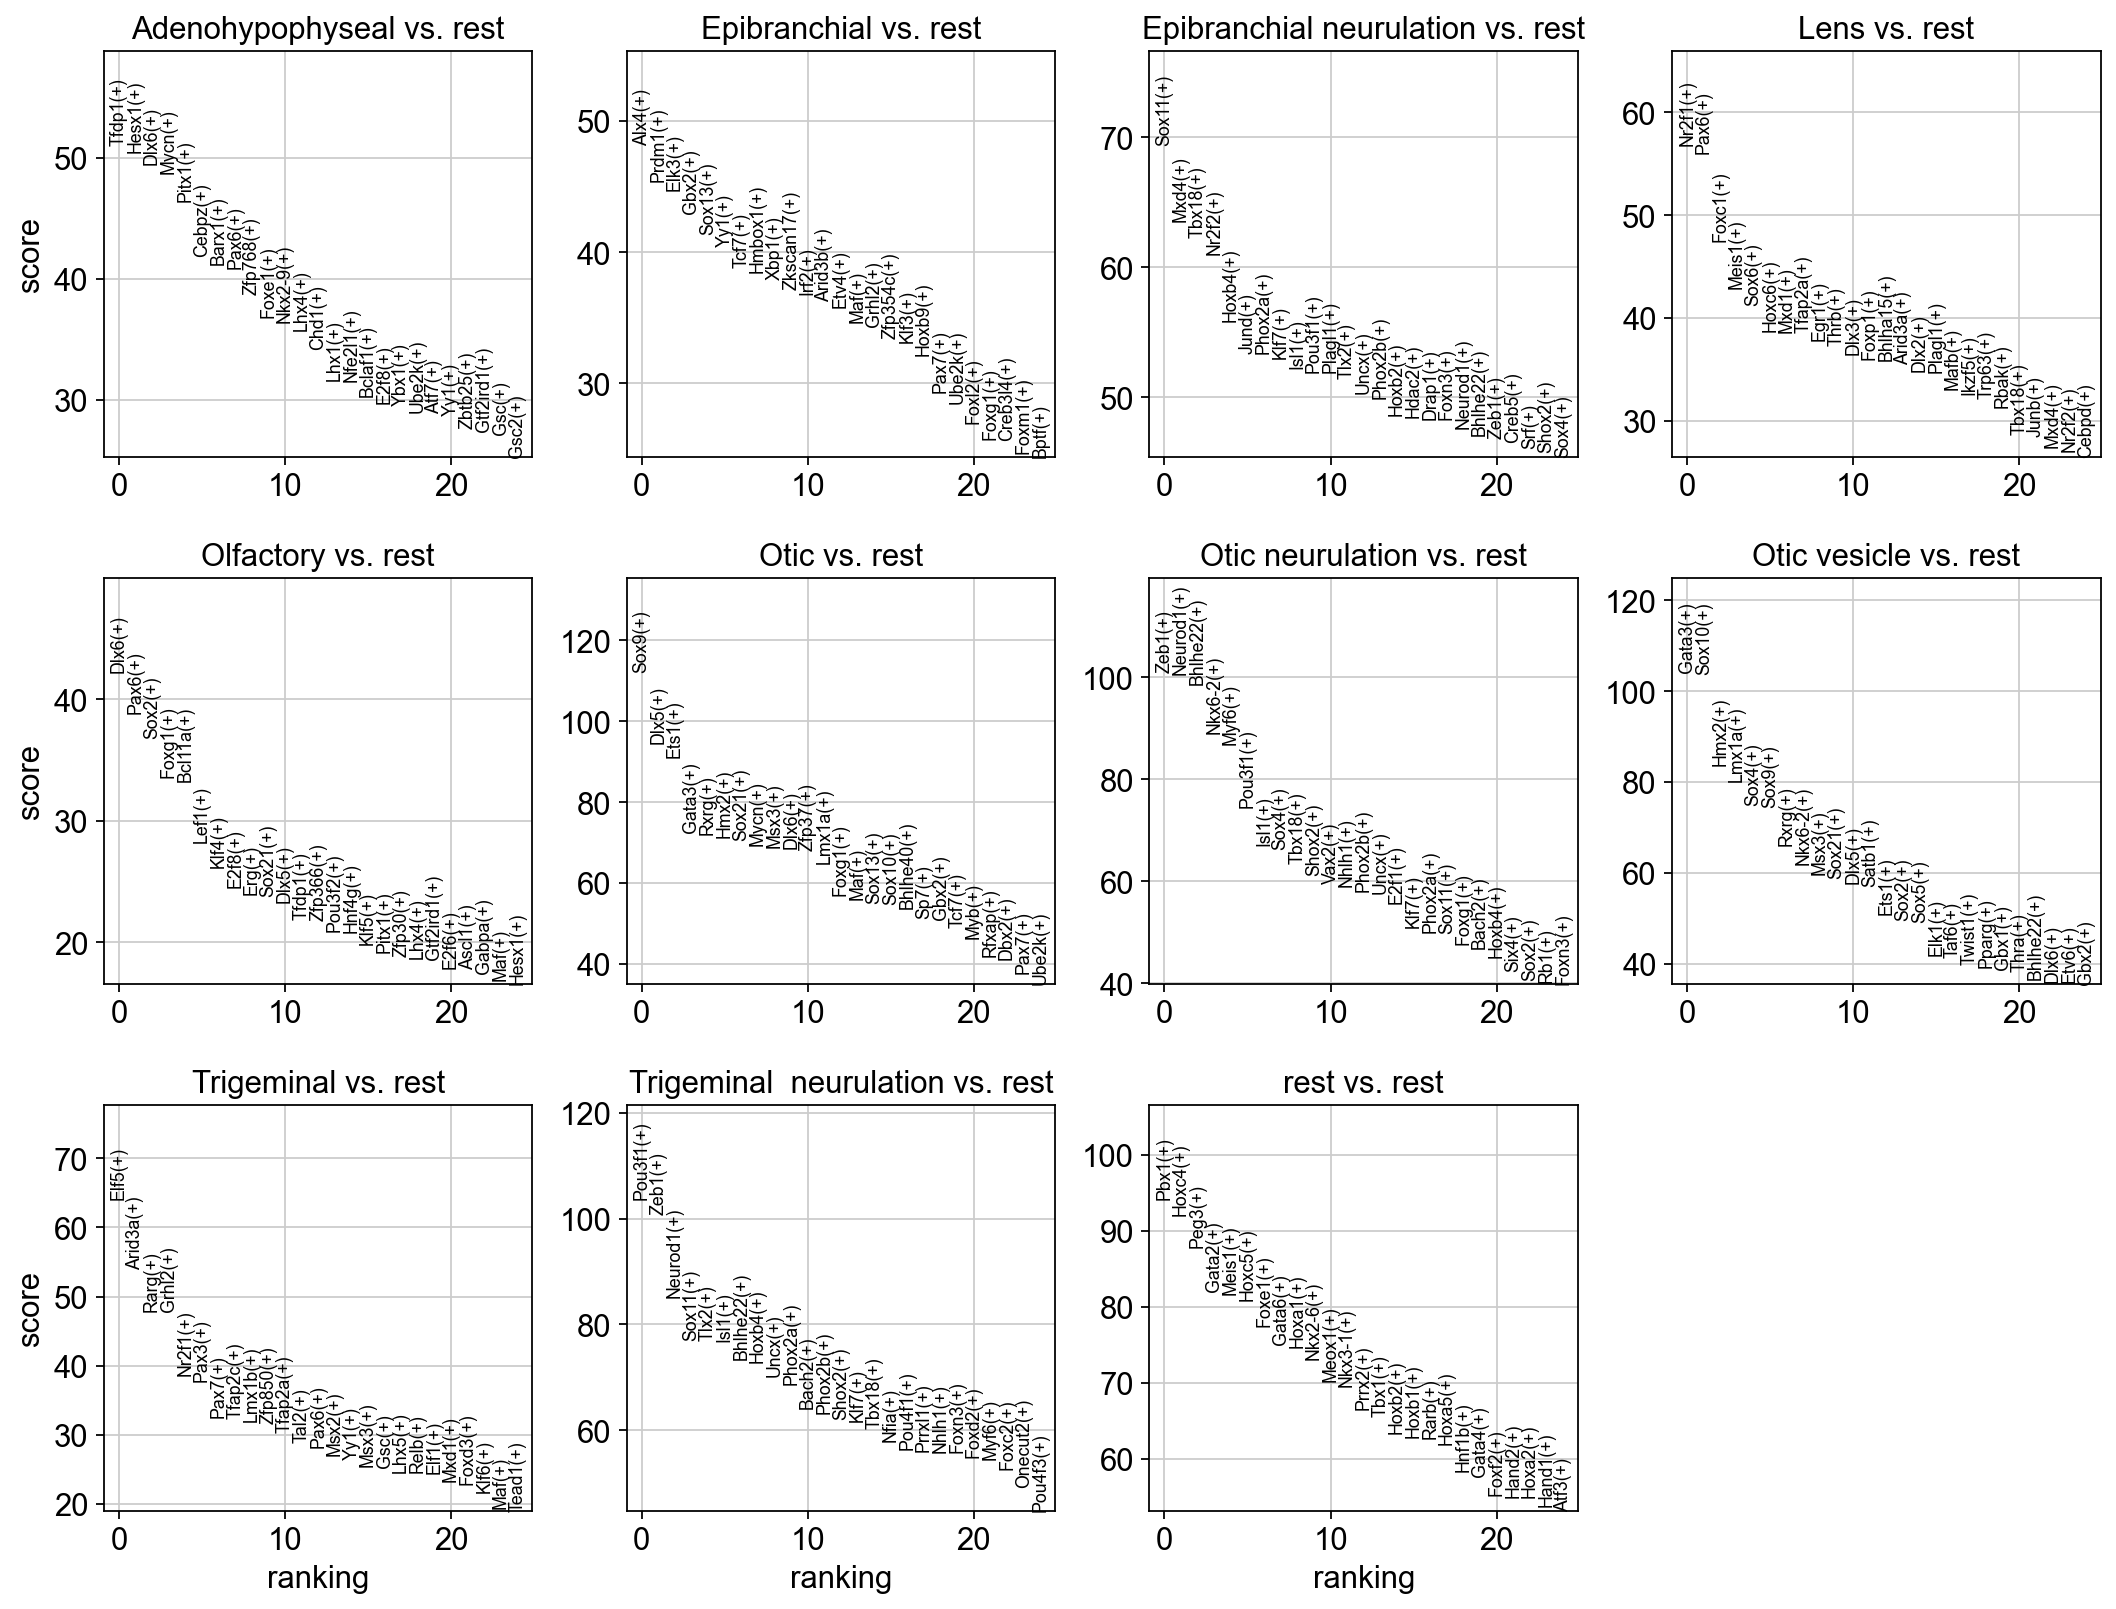

In [28]:
sc.tl.rank_genes_groups(adata, "cluster_annotations", mask_var="highly_variable", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [29]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key[:1]}": result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(30)

,Adenohypophyseal_n,Adenohypophyseal_p,Epibranchial_n,Epibranchial_p,Epibranchial neurulation_n,Epibranchial neurulation_p,Lens_n,Lens_p,Olfactory_n,Olfactory_p,...,Otic neurulation_n,Otic neurulation_p,Otic vesicle_n,Otic vesicle_p,Trigeminal_n,Trigeminal_p,Trigeminal neurulation_n,Trigeminal neurulation_p,rest_n,rest_p
0,Tfdp1(+),0.000000e+00,Alx4(+),0.000000e+00,Sox11(+),0.000000e+00,Nr2f1(+),3.193402e-297,Dlx6(+),1.762287e-181,...,Zeb1(+),0.000000e+00,Gata3(+),0.000000e+00,Elf5(+),0.000000e+00,Pou3f1(+),0.000000e+00,Pbx1(+),0.0
1,Hesx1(+),0.000000e+00,Prdm1(+),0.000000e+00,Mxd4(+),0.000000e+00,Pax6(+),6.971934e-290,Pax6(+),3.209200e-166,...,Neurod1(+),0.000000e+00,Sox10(+),0.000000e+00,Arid3a(+),0.000000e+00,Zeb1(+),0.000000e+00,Hoxc4(+),0.0
2,Dlx6(+),0.000000e+00,Elk3(+),0.000000e+00,Tbx18(+),0.000000e+00,Foxc1(+),7.184761e-244,Sox2(+),2.874066e-155,...,Bhlhe22(+),0.000000e+00,Hmx2(+),0.000000e+00,Rarg(+),0.000000e+00,Neurod1(+),0.000000e+00,Peg3(+),0.0
3,Mycn(+),0.000000e+00,Gbx2(+),0.000000e+00,Nr2f2(+),0.000000e+00,Meis1(+),4.612501e-217,Foxg1(+),3.204517e-140,...,Nkx6-2(+),0.000000e+00,Lmx1a(+),0.000000e+00,Grhl2(+),0.000000e+00,Sox11(+),0.000000e+00,Gata2(+),0.0
4,Pitx1(+),0.000000e+00,Sox13(+),0.000000e+00,Hoxb4(+),0.000000e+00,Sox6(+),7.061669e-208,Bcl11a(+),3.738282e-138,...,Myf6(+),0.000000e+00,Sox4(+),0.000000e+00,Nr2f1(+),1.602883e-261,Tlx2(+),0.000000e+00,Meis1(+),0.0
5,Cebpz(+),1.029163e-311,Yy1(+),0.000000e+00,Jund(+),0.000000e+00,Hoxc6(+),1.436329e-194,Lef1(+),8.387194e-113,...,Pou3f1(+),0.000000e+00,Sox9(+),0.000000e+00,Pax3(+),3.733827e-250,Isl1(+),0.000000e+00,Hoxc5(+),0.0
6,Barx1(+),2.457406e-294,Tcf7(+),1.971147e-297,Phox2a(+),0.000000e+00,Mxd1(+),1.435323e-190,Klf4(+),2.953825e-101,...,Isl1(+),5.928788e-323,Rxrg(+),0.000000e+00,Pax7(+),2.744273e-196,Bhlhe22(+),0.000000e+00,Foxe1(+),0.0
7,Pax6(+),3.858403e-290,Hmbox1(+),6.967902e-288,Klf7(+),0.000000e+00,Tfap2a(+),4.471229e-192,E2f8(+),5.411015e-93,...,Sox4(+),7.707424e-322,Nkx6-2(+),0.000000e+00,Tfap2c(+),1.426168e-195,Hoxb4(+),0.000000e+00,Gata6(+),0.0
8,Zfp768(+),3.754339e-269,Xbp1(+),3.277867e-286,Isl1(+),0.000000e+00,Egr1(+),6.938149e-189,Erg(+),8.723566e-90,...,Tbx18(+),1.178279e-307,Msx3(+),0.000000e+00,Lmx1b(+),4.353776e-190,Uncx(+),0.000000e+00,Hoxa1(+),0.0
9,Foxe1(+),1.811814e-247,Zkscan17(+),1.412207e-271,Pou3f1(+),0.000000e+00,Thrb(+),1.249025e-182,Sox21(+),1.303925e-88,...,Shox2(+),2.828319e-294,Sox21(+),0.000000e+00,Zfp850(+),1.171253e-186,Phox2a(+),0.000000e+00,Nkx2-6(+),0.0


In [30]:
# Define target clusters
focus_clusters = [
    "Olfactory", "Lens", "Adenohypophyseal", 
    "Trigeminal", "Otic", "Epibranchial"
]

# Subset
adata_focus = adata[adata.obs['cluster_annotations'].isin(focus_clusters)].copy()

# Make sure it's a category with only relevant clusters
adata_focus.obs['cluster_annotations'] = adata_focus.obs['cluster_annotations'].astype("category")
adata_focus.obs['cluster_annotations'].cat.remove_unused_categories(inplace=True)


/tmp/ipykernel_165463/39003974.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  adata_focus.obs['cluster_annotations'].cat.remove_unused_categories(inplace=True)


In [31]:
# Run marker test for regulons (assuming AUCs are stored in adata.X)
sc.tl.rank_genes_groups(
    adata_focus, 
    groupby="cluster_annotations", 
    method="t-test", 
    use_raw=False
)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


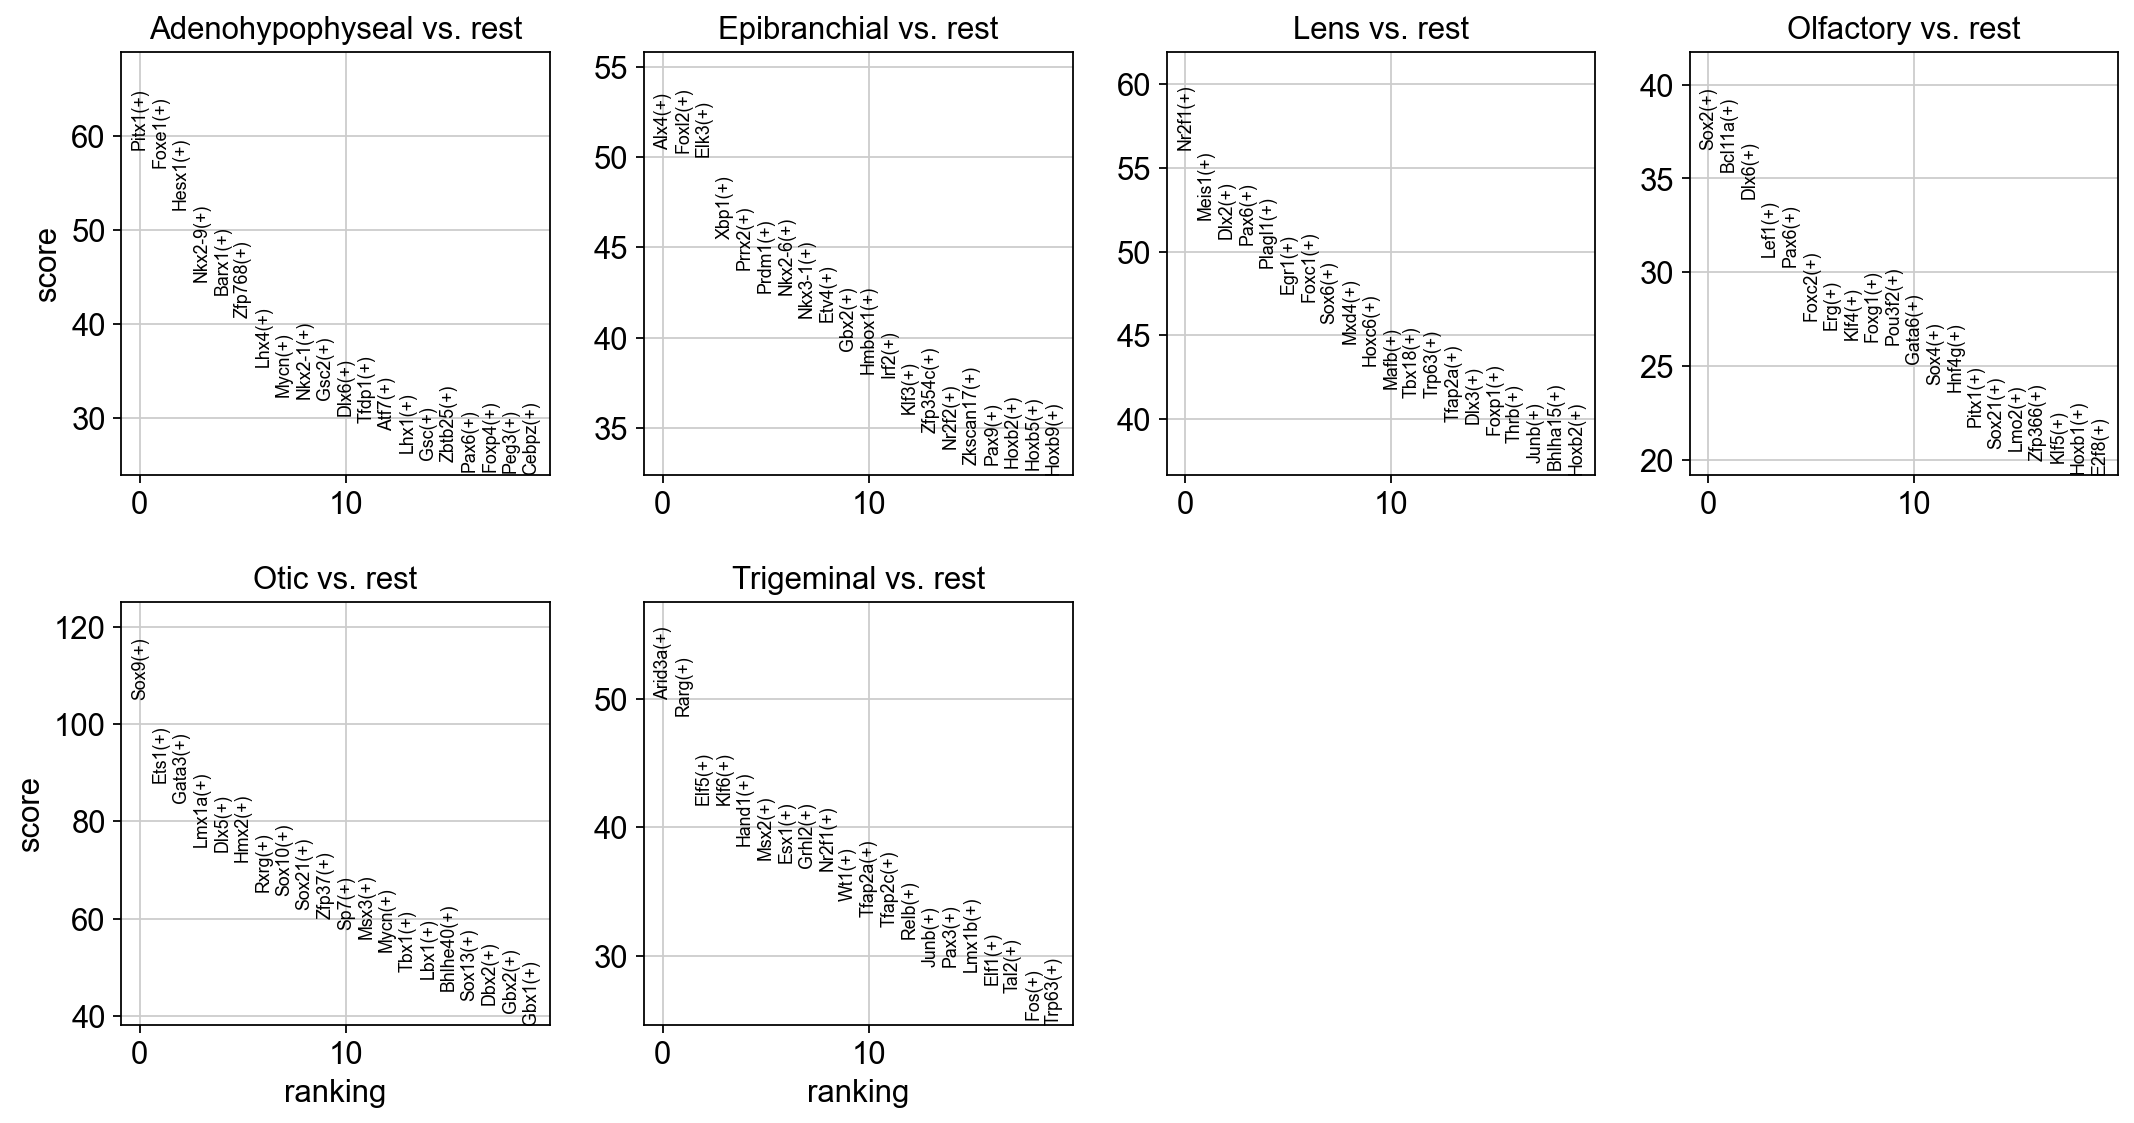

In [32]:
sc.pl.rank_genes_groups(adata_focus, n_genes=20, sharey=False)


In [33]:
adata_focus = adata[adata.obs['cluster_annotations'].isin(focus_clusters)].copy()
sc.tl.rank_genes_groups(adata_focus, groupby="cluster_annotations", method="t-test")


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


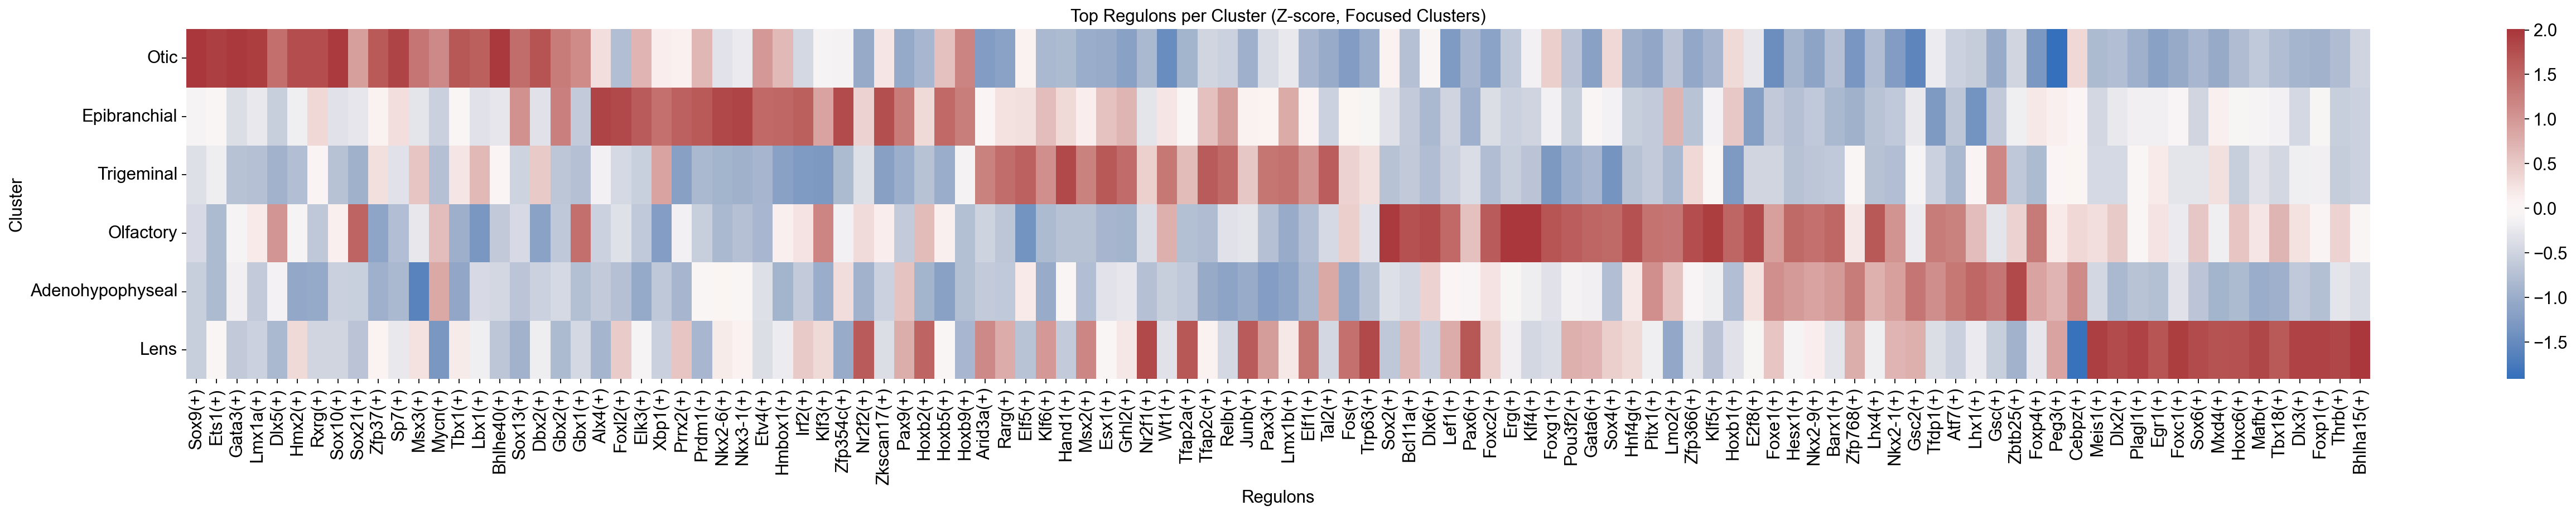

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

# Step 1: Define focus cluster order
focus_clusters = [
  "Otic",  "Epibranchial" ,"Trigeminal",  "Olfactory", "Adenohypophyseal",  "Lens",

]

# Step 2: Extract top regulons per cluster
result = adata_focus.uns['rank_genes_groups']
top_n = 20
grouped_regulons = []

for cluster in focus_clusters:
    if cluster in result['names'].dtype.names:
        regulons = result['names'][cluster][:top_n].tolist()
        grouped_regulons.extend(regulons)

# Remove duplicates (preserve order)
grouped_regulons = list(OrderedDict.fromkeys(grouped_regulons))

# Step 3: Prepare AUC matrix
auc_df = pd.DataFrame(adata_focus.X, index=adata_focus.obs_names, columns=adata_focus.var_names)
auc_df['cluster'] = adata_focus.obs['cluster_annotations'].values

# Add missing regulons if needed
for reg in grouped_regulons:
    if reg not in auc_df.columns:
        auc_df[reg] = 0.0

# Step 4: Compute cluster-mean AUCs and apply Z-score normalization
mean_auc = auc_df.groupby('cluster')[grouped_regulons].mean()

# Ensure cluster order
mean_auc = mean_auc.reindex(focus_clusters).fillna(0)

# Z-score per regulon
mean_auc_z = (mean_auc - mean_auc.mean()) / mean_auc.std()

# Step 5: Plot heatmap
plt.figure(figsize=(33, 6))
sns.heatmap(mean_auc_z, cmap='vlag', center=0, xticklabels=True, yticklabels=True)
plt.title("Top Regulons per Cluster (Z-score, Focused Clusters)")
plt.xlabel("Regulons")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
